In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [23]:
df=pd.read_csv('tmdb_movies.csv')

In [24]:
df.head()

,title,overview,genre_ids,genre_names
0,Zootopia 2,After cracking the biggest case in Zootopia's ...,"[16, 35, 12, 10751, 9648]","['Animation', 'Comedy', 'Adventure', 'Family',..."
1,The Running Man,"Desperate to save his sick daughter, working-c...","[28, 53, 878]","['Action', 'Thriller', 'Science Fiction']"
2,Wake Up Dead Man: A Knives Out Mystery,When young priest Jud Duplenticy is sent to as...,"[53, 9648, 18]","['Thriller', 'Mystery', 'Drama']"
3,Hunting Season,When a reclusive survivalist and his daughter ...,"[28, 18, 53]","['Action', 'Drama', 'Thriller']"
4,TRON: Ares,A highly sophisticated Program called Ares is ...,"[878, 12, 28]","['Science Fiction', 'Adventure', 'Action']"


In [25]:
import pandas as pd

df = pd.read_csv(
    "tmdb_movies.csv",
    converters={
        "genre_ids": eval,
        "genre_names": eval
    }
)


In [26]:
'''
#if not using converters parameter in read_csv
#from string to og python list

import ast
df["genre_ids"] = df["genre_ids"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df["genre_names"] = df["genre_names"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
'''

'\n#if not using converters parameter in read_csv\n#from string to og python list\n\nimport ast\ndf["genre_ids"] = df["genre_ids"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)\ndf["genre_names"] = df["genre_names"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)\n'

In [27]:
#vrom list to normal 

df["genre_ids"] = df["genre_ids"].apply(lambda x: ",".join([str(i) for i in x]))
df["genre_names"] = df["genre_names"].apply(lambda x: ",".join(x))
df.head()

,title,overview,genre_ids,genre_names
0,Zootopia 2,After cracking the biggest case in Zootopia's ...,"16,35,12,10751,9648","Animation,Comedy,Adventure,Family,Mystery"
1,The Running Man,"Desperate to save his sick daughter, working-c...","28,53,878","Action,Thriller,Science Fiction"
2,Wake Up Dead Man: A Knives Out Mystery,When young priest Jud Duplenticy is sent to as...,"53,9648,18","Thriller,Mystery,Drama"
3,Hunting Season,When a reclusive survivalist and his daughter ...,"28,18,53","Action,Drama,Thriller"
4,TRON: Ares,A highly sophisticated Program called Ares is ...,"878,12,28","Science Fiction,Adventure,Action"


In [28]:
path='./cleaned_tmdb_movies.csv'
df.to_csv(path, index=False)

In [29]:
#perform eda

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9980 non-null   object
 1   overview     9342 non-null   object
 2   genre_ids    9980 non-null   object
 3   genre_names  9980 non-null   object
dtypes: object(4)
memory usage: 312.0+ KB


In [30]:
df.describe()

,title,overview,genre_ids,genre_names
count,9980,9342,9980,9980
unique,7973,7545,1626,1626
top,The Specialist,Kilink is between 2 rival gangs and manages to...,35,Comedy
freq,5,4,927,927


In [31]:
df.isnull().sum()

title            0
overview       638
genre_ids        0
genre_names      0
dtype: int64

In [32]:
#count total columns
df.shape

(9980, 4)

In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(9342, 4)

In [46]:
df['genre_list'] = df['genre_names'].str.split(',')
all_genres = [genre for sublist in df['genre_list'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

count=0
for i in genre_counts:
    count+=1
print("Total unique genres:", count)

#each genre count
for genre, cnt in genre_counts.items():
    print(f"{genre}: {cnt}")

Total unique genres: 20
Drama: 3287
Comedy: 2957
Action: 1598
Thriller: 1394
Adventure: 1247
Romance: 1126
Documentary: 1003
Crime: 1002
Family: 911
Fantasy: 804
Horror: 801
Animation: 755
TV Movie: 738
Science Fiction: 684
Mystery: 523
Music: 435
History: 401
War: 269
Western: 251
: 233


In [43]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])


C:\Users\Aliza Momin\AppData\Local\Temp\ipykernel_5652\3287009824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df.sort_values('Count', ascending=False), palette='viridis')


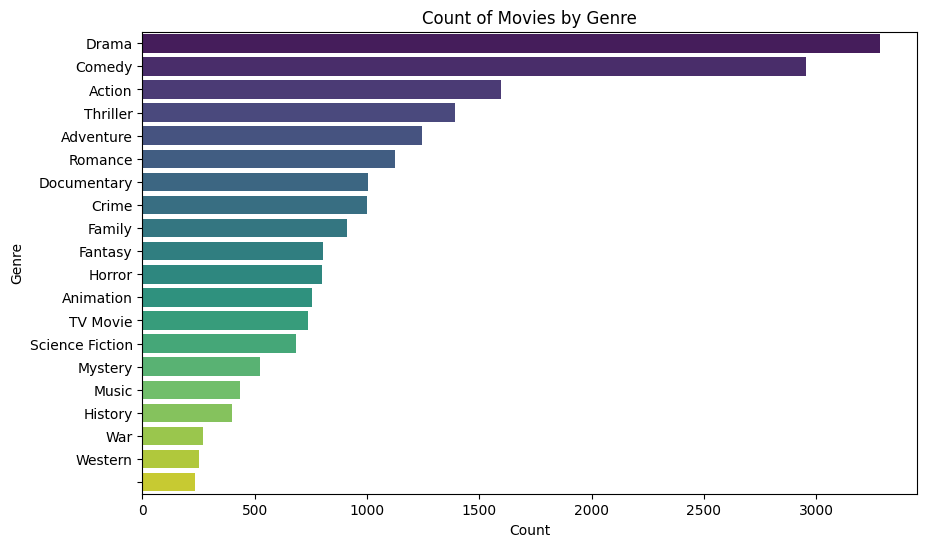

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genre_df.sort_values('Count', ascending=False), palette='viridis')
plt.title('Count of Movies by Genre')
plt.show()


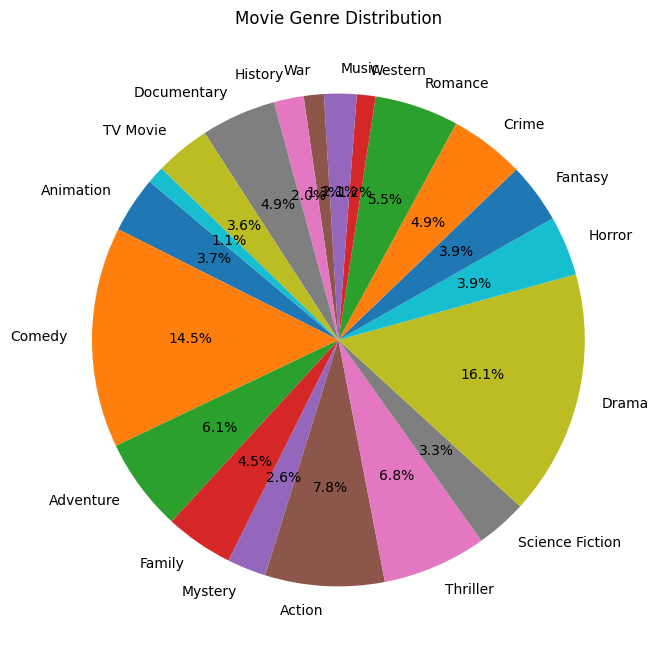

In [47]:
plt.figure(figsize=(8,8))
plt.pie(genre_df['Count'], labels=genre_df['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Movie Genre Distribution')
plt.show()


In [49]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Example df
df['genre_list'] = df['genre_names'].str.split(',')

# Count all genre pairs across all movies
pair_counts = Counter()
for genres in df['genre_list']:
    # Create all combinations of 2 genres for this movie
    for pair in combinations(genres, 2):
        # Sort pair so (Action, Comedy) == (Comedy, Action)
        pair_counts[tuple(sorted(pair))] += 1

# Convert to DataFrame
pair_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values('Count', ascending=False)
print(pair_df)


                       Pair  Count
40         (Drama, Romance)    665
64          (Comedy, Drama)    657
18      (Action, Adventure)    591
63        (Comedy, Romance)    508
10       (Action, Thriller)    497
..                      ...    ...
158  (Documentary, Romance)      2
160       (Music, Thriller)      2
161   (Action, Documentary)      2
162         (Action, Music)      1
164        (Music, Mystery)      1

[165 rows x 2 columns]
